In [15]:
import qiskit
from qiskit import transpile
from qiskit_aer.primitives import SamplerV2
from qiskit_aer import AerSimulator



In [16]:
num_qubits = 22
num_shots = 2**20
simulator = AerSimulator(method='stabilizer', device='CPU')
gpu_simulator = AerSimulator(method='tensor_network', device='GPU')
print(simulator.available_devices(), simulator)
print(simulator.available_methods())
print(gpu_simulator.available_devices(), gpu_simulator)
print(gpu_simulator.available_methods())

('CPU', 'GPU') AerSimulator('aer_simulator_stabilizer')
('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop', 'tensor_network')
['GPU'] AerSimulator('aer_simulator_tensor_network_gpu')
('automatic', 'statevector', 'density_matrix', 'stabilizer', 'matrix_product_state', 'extended_stabilizer', 'unitary', 'superop', 'tensor_network')


In [17]:
# Basic-CPU-Sim

# Generate n-qubit GHZ state
circ = qiskit.QuantumCircuit(num_qubits)
circ.h(0)
for i in range(num_qubits-1):
    circ.cx(i, i+1)
    circ.h(i+1)


circ.measure_all()

# circ.draw('mpl')


In [18]:
transpiled_circ = transpile(circ, simulator)
result = simulator.run(transpiled_circ, shots=num_shots).result()
# counts = dict(sorted(result.get_counts(circ).items()))

# print(counts)

In [19]:
transpiled_circ = transpile(circ, gpu_simulator)
result = gpu_simulator.run(transpiled_circ, shots=num_shots).result()
# counts = dict(sorted(result.get_counts(circ).items()))

# print(counts)

In [20]:

# Construct an ideal simulator with SamplerV2
sampler = SamplerV2()
print(sampler.options)
job = sampler.run([circ], shots=num_shots)

# Perform an ideal simulation
result_ideal = job.result()
# counts_ideal = result_ideal[0].data.meas.get_counts()
# print('Counts(ideal):', counts_ideal)

Options(backend_options={}, run_options={})


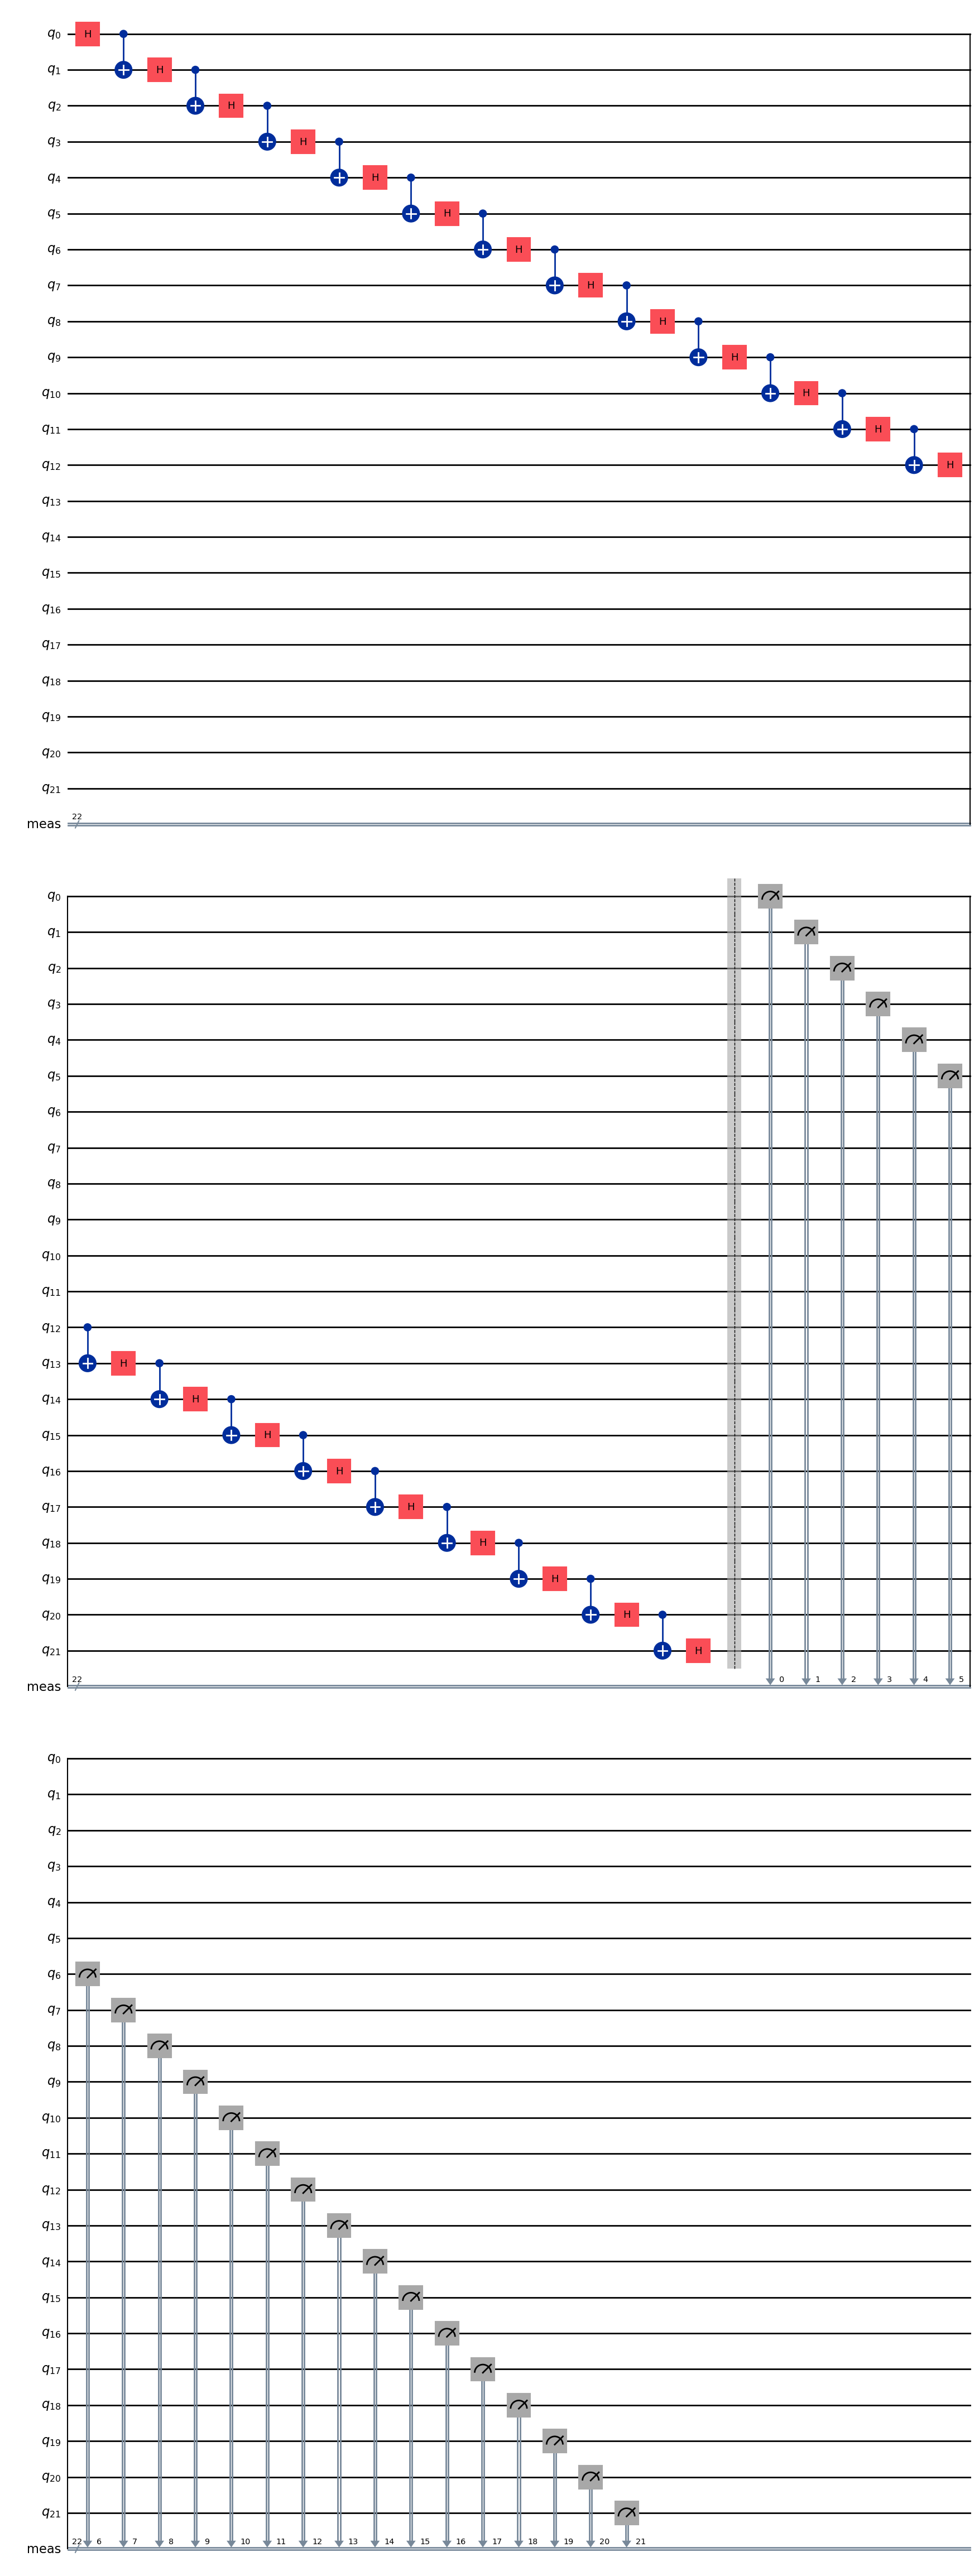

In [21]:
transpiled_circ.draw('mpl')